### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [41]:
data = pd.read_csv('data/coupons.csv')

In [42]:
data.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10535,No Urgent Place,Alone,Sunny,80,10PM,Restaurant(<20),1d,Female,50plus,Married partner,...,never,4~8,less1,1~3,1,0,0,0,1,1
4312,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,0,0,1,0,0
11393,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,50plus,Married partner,...,less1,less1,less1,less1,1,1,0,0,1,1
3453,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,below21,Single,...,1~3,4~8,4~8,1~3,1,1,0,0,1,1
375,No Urgent Place,Kid(s),Sunny,80,2PM,Restaurant(<20),1d,Female,31,Married partner,...,less1,4~8,4~8,less1,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [43]:
# check the number of nan's 
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [44]:
# what are the unique entries in these columns

print("car: " + np.array2string(data.car.unique()) )
print("Bar: " + np.array2string(data.Bar.unique()) )
print("CoffeeHouse: " + np.array2string(data.CoffeeHouse.unique()) )
print("CarrayAway: " + np.array2string(data.CarryAway.unique()) )
print("RestaurantLessThan20: " + np.array2string(data.RestaurantLessThan20.unique()) )
print("Restaurant20to50: " + np.array2string(data.Restaurant20To50.unique()) )

car: [nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Bar: ['never' 'less1' '1~3' 'gt8' nan '4~8']
CoffeeHouse: ['never' 'less1' '4~8' '1~3' 'gt8' nan]
CarrayAway: [nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20: ['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20to50: ['1~3' 'less1' 'never' 'gt8' '4~8' nan]


In [45]:
# what percent is nan's

print('Percent of missing "car" records is %.2f%%' %((data['car'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "Bar" records is %.2f%%' %((data['Bar'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "CoffeeHouse" records is %.2f%%' %((data['CoffeeHouse'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "CarryAway" records is %.2f%%' %((data['CarryAway'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "RestaurantLessThan20" records is %.2f%%' %((data['RestaurantLessThan20'].isnull().sum()/data.shape[0])*100))
print('Percent of missing "Restaurant20To50" records is %.2f%%' %((data['Restaurant20To50'].isnull().sum()/data.shape[0])*100))

Percent of missing "car" records is 99.15%
Percent of missing "Bar" records is 0.84%
Percent of missing "CoffeeHouse" records is 1.71%
Percent of missing "CarryAway" records is 1.19%
Percent of missing "RestaurantLessThan20" records is 1.02%
Percent of missing "Restaurant20To50" records is 1.49%


3. Decide what to do about your missing data -- drop, replace, other...

In [46]:
# drop car since > 99% missing
data.drop(columns=['car'], inplace=True )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [47]:
# convert the rest of nan's to never under the assumption that no response was equivanlent 

data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']] = data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].fillna('never')

In [51]:
# now check for any nans remaining?

data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [52]:
# now check for any nans remaining?

print("Bar: " + np.array2string(data.Bar.unique()) )
print("CoffeeHouse: " + np.array2string(data.CoffeeHouse.unique()) )
print("CarrayAway: " + np.array2string(data.CarryAway.unique()) )
print("RestaurantLessThan20: " + np.array2string(data.RestaurantLessThan20.unique()) )
print("Restaurant20to50: " + np.array2string(data.Restaurant20To50.unique()) )

Bar: ['never' 'less1' '1~3' 'gt8' '4~8']
CoffeeHouse: ['never' 'less1' '4~8' '1~3' 'gt8']
CarrayAway: ['never' '4~8' '1~3' 'gt8' 'less1']
RestaurantLessThan20: ['4~8' '1~3' 'less1' 'gt8' 'never']
Restaurant20to50: ['1~3' 'less1' 'never' 'gt8' '4~8']


4. What proportion of the total observations chose to accept the coupon? 



In [76]:
data = data.rename(columns={"Y": "TookCoupon" })
# data.info()
print( data['TookCoupon'].value_counts().sort_index()/data['TookCoupon'].count() )

0    0.431567
1    0.568433
Name: TookCoupon, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Counts')

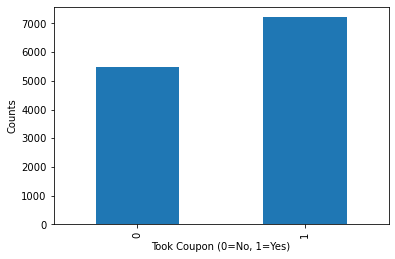

In [78]:
ax = data['TookCoupon'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('Took Coupon (0=No, 1=Yes)')
ax.set_ylabel('Counts')

6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Counts')

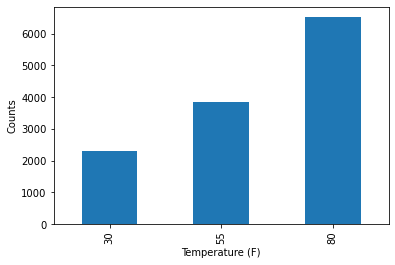

In [74]:
ax = data['temperature'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Counts')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [137]:
### Clean the data Bar column categorical data
###
data.loc[ data["Bar"] == "less1", "Bar" ] = "lt1"
data['Bar'] = pd.Categorical(
    data['Bar'], 
    categories=['never', 'lt1', '1~3', '4~8', 'gt8'], 
    ordered=True)
print(data.Bar.unique())

['never', 'lt1', '1~3', 'gt8', '4~8']
Categories (5, object): ['never' < 'lt1' < '1~3' < '4~8' < 'gt8']


In [139]:
### clean the data age column categorical data
###
data.loc[ data["age"] == "below21", "age" ] = "0 - 20"  
data.loc[ data["age"] == "21", "age" ] = "21 - 25"
data.loc[ data["age"] == "26", "age" ] = "26 - 30"
data.loc[ data["age"] == "31", "age" ] = "31 - 35"
data.loc[ data["age"] == "36", "age" ] = "36 - 40"
data.loc[ data["age"] == "41", "age" ] = "41 - 45"
data.loc[ data["age"] == "46", "age" ] = "46 - 49"
data.loc[ data["age"] == "50plus", "age" ] = "50 - 99"

data['age'] = pd.Categorical(
    data['age'], 
    categories=['0 - 20', '21 - 25', '26 - 30', '31 - 35', '36 - 40', '41 - 45', '46 - 49', '50 - 99'], 
    ordered=True)
print(data.age.unique())

['21 - 25', '46 - 49', '26 - 30', '31 - 35', '41 - 45', '50 - 99', '36 - 40', '0 - 20']
Categories (8, object): ['0 - 20' < '21 - 25' < '26 - 30' < '31 - 35' < '36 - 40' < '41 - 45' < '46 - 49' < '50 - 99']


In [262]:
#### Select only the participants that received the coupon='Bar' + age and Bar columns
####
df_Bar = data.query("coupon == 'Bar'")[['TookCoupon']]
# df_Bar.sample(10)

2. What proportion of bar coupons were accepted?


In [263]:
print( df_Bar['TookCoupon'].value_counts(), len(df_Bar) )
print( df_Bar['TookCoupon'].value_counts() / len(df_Bar) )

0    1190
1     827
Name: TookCoupon, dtype: int64 2017
0    0.589985
1    0.410015
Name: TookCoupon, dtype: float64


Out of the 2017 participants who were offered the coupon=Bar, 41% accepted the coupon and 59% did not

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [275]:
df_Bar = data.query("coupon == 'Bar'")[['TookCoupon', 'Bar']]
# print(df_Bar.Bar.unique())
df_tmp = df_Bar.query("Bar == 'lt1' or Bar == '1~3' ")[['TookCoupon']]
print(df_tmp.value_counts(), len(df_tmp))
print(df_tmp.value_counts() / len(df_tmp))

TookCoupon
1             510
0             457
dtype: int64 967
TookCoupon
1             0.527404
0             0.472596
dtype: float64


In [276]:
df_Bar = data.query("coupon == 'Bar'")[['TookCoupon', 'Bar']]
df_tmp = df_Bar.query("Bar == '4~8' or Bar == 'gt8' ")[['TookCoupon']]
print(df_tmp.value_counts(), len(df_tmp))
print(df_tmp.value_counts() / len(df_tmp))

TookCoupon
1             153
0              46
dtype: int64 199
TookCoupon
1             0.768844
0             0.231156
dtype: float64


In the group of 967 that went to the bar 3 or fewer times a month accepted the Bar coupon at a rate of 52.7%
In the group of 199 that went to the bar more than 3 times a month accepted the Bar coupon at a rate of 76.9%

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [277]:
df_Bar = data.query("coupon == 'Bar'")[['TookCoupon', 'Bar', 'age']]
# df_Bar.age.unique()

df_tmp = df_Bar.loc[ df_Bar['Bar'].ge('1~3') ]
df_tmp = df_tmp.loc[ df_tmp['age'].ge('26 - 30')]

# print(df_tmp.Bar.unique())
# print(df_tmp.age.unique())

print(df_tmp['TookCoupon'].value_counts(), len(df_tmp))
print(df_tmp['TookCoupon'].value_counts() / len(df_tmp))

1    292
0    128
Name: TookCoupon, dtype: int64 420
1    0.695238
0    0.304762
Name: TookCoupon, dtype: float64


In [278]:
df_Bar = data.query("coupon == 'Bar'")[['TookCoupon', 'Bar', 'age']]
df_tmp = df_Bar.loc[ df_Bar['Bar'].lt('1~3') ]
df_tmp = df_tmp.loc[ df_tmp['age'].lt('26 - 30')]

# print(df_tmp.Bar.unique())
# print(df_tmp.age.unique())

print(df_tmp['TookCoupon'].value_counts(), len(df_tmp))
print(df_tmp['TookCoupon'].value_counts() / len(df_tmp))

0    199
1    129
Name: TookCoupon, dtype: int64 328
0    0.606707
1    0.393293
Name: TookCoupon, dtype: float64


The acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 is 69.5%
The acceptance rate of all others is 39.3%. 
There is a 30.2% increase for those who frequent bars more than once a month and are over the age of 25 compared to all others. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [247]:
df_Bar = data.query("coupon == 'Bar'")[['TookCoupon', 'Bar', 'passanger', 'occupation']]
# df_Bar.sample(10)
# print( df_Bar.Bar.unique() )
# print( df_Bar.passanger.unique() ) 
# print( df_Bar.occupation.unique() )
df_tmp = df_Bar.loc[ df_Bar['Bar'].ge('1~3') ]
df_tmp = df_tmp.loc[ df_tmp['passanger'].ne('Kid(s)')]
df_tmp = df_tmp.loc[ df_tmp['occupation'].ne('Farming Fishing & Forestry')]

# print(df_tmp.Bar.unique())
# print(df_tmp.passanger.unique())
# print(df_tmp.occupation.unique())

print(df_tmp['TookCoupon'].value_counts(), len(df_tmp))
print(df_tmp['TookCoupon'].value_counts() / len(df_tmp))

1    393
0    158
Name: TookCoupon, dtype: int64 551
1    0.713249
0    0.286751
Name: TookCoupon, dtype: float64


The acceptance rate between drivers who go to a bar month than once a month, had one passanger not kids, and occupations not (farming, fishing, forestry) is 71.3%
This is a 2% higher rate than the previous above rate. 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [248]:
df_Bar = data.query("coupon == 'Bar'")[['TookCoupon', 'Bar', 'passanger', 'maritalStatus']]
df_tmp = df_Bar.loc[ df_Bar['Bar'].ge('1~3') ]
df_tmp = df_tmp.loc[ df_tmp['passanger'].ne('Kid(s)')]
df_tmp = df_tmp.loc[ df_tmp['maritalStatus'].ne('Widowed')]

# print(df_tmp.Bar.unique())
# print(df_tmp.passanger.unique())
# print(df_tmp.maritalStatus.unique())

print(df_tmp['TookCoupon'].value_counts(), len(df_tmp))
print(df_tmp['TookCoupon'].value_counts() / len(df_tmp))

1    393
0    158
Name: TookCoupon, dtype: int64 551
1    0.713249
0    0.286751
Name: TookCoupon, dtype: float64


The acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed is 71.3%. This is the same rate as above in question #6. 

Based on these observations, I hypothesize that drivers who accepted the bar coupons are more likely to visit bars more than once a month, dont have kids, over the age of 25. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

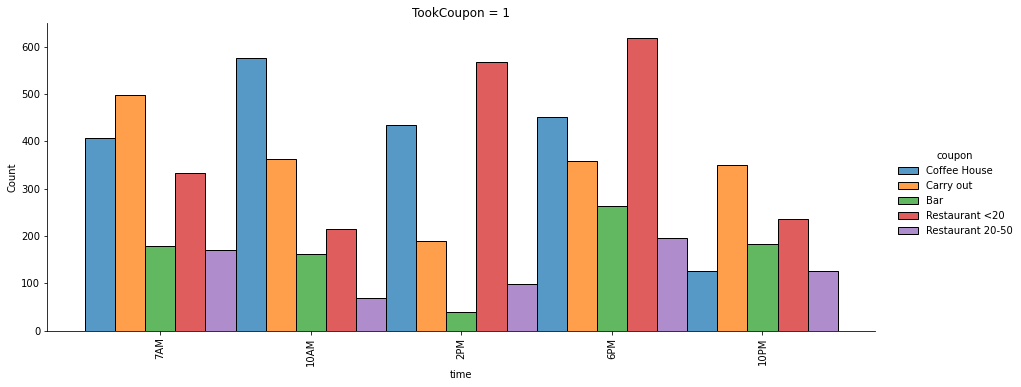

In [279]:
## rename and order the categorical data
##
data['time'] = pd.Categorical(
    data['time'], 
    categories=["7AM", "10AM", "2PM", "6PM", "10PM"], 
    ordered=True)

data.loc[ data["coupon"] == "Coffee House", "coupon" ]           = "Coffee House"
data.loc[ data["coupon"] == "Restaurant(<20)", "coupon" ]        = "Restaurant <20"
data.loc[ data["coupon"] == "Carry out & Take away", "coupon" ]  = "Carry out"
data.loc[ data["coupon"] == "Bar", "coupon" ]                    = "Bar"
data.loc[ data["coupon"] == "Restaurant(20-50)", "coupon" ]      = "Restaurant 20-50"
data['coupon'] = pd.Categorical(
    data['coupon'], 
    categories=["Coffee House", "Carry out", "Bar", "Restaurant <20", "Restaurant 20-50"], 
    ordered=True)

data.loc[ data["income"] == "Less than $12500", "income" ] = "0 - 12500"
data.loc[ data["income"] == "$12500 - $24999", "income" ] = "12500 - 24999"
data.loc[ data["income"] == "$25000 - $37499", "income" ] = "25000 - 37499"
data.loc[ data["income"] == "$37500 - $49999", "income" ] = "37500 - 49999"
data.loc[ data["income"] == "$50000 - $62499", "income" ] = "50000 - 62499"
data.loc[ data["income"] == "$62500 - $74999", "income" ] = "62500 - 74999"
data.loc[ data["income"] == "$75000 - $87499", "income" ] = "75000 - 87499"
data.loc[ data["income"] == "$87500 - $99999", "income" ] = "87500 - 99999"
data.loc[ data["income"] == "$100000 or More", "income" ] = "100000 - 999999"
data['income'] = pd.Categorical(
    data['income'], 
    categories=['0 - 12500', '12500 - 24999', '25000 - 37499', '37500 - 49999', '50000 - 62499', '62500 - 74999', '75000 - 87499', '87500 - 99999', '100000 - 999999'], 
    ordered=True)

## make a histogram plot with comparing counts of drivers who took coupons, the type of coupon and time day
##
ax = sns.displot(data=data.query("TookCoupon == 1"), x='time', hue='coupon', multiple='dodge', height=5, aspect=2.5 )
plt.xticks(rotation=90)
ax.set(title='TookCoupon = 1')

Drivers accepted coffee house coupons in the morning 10AM and also in the afternoon 2PM. 
Drivers also accepted restaurant coupons for < $20 at 2PM and 6PM
Drivers accepted mostly carry out for 7AM and 10PM early and late times.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Carry out'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Restaurant <20'),
  Text(4, 0, 'Restaurant 20-50')])

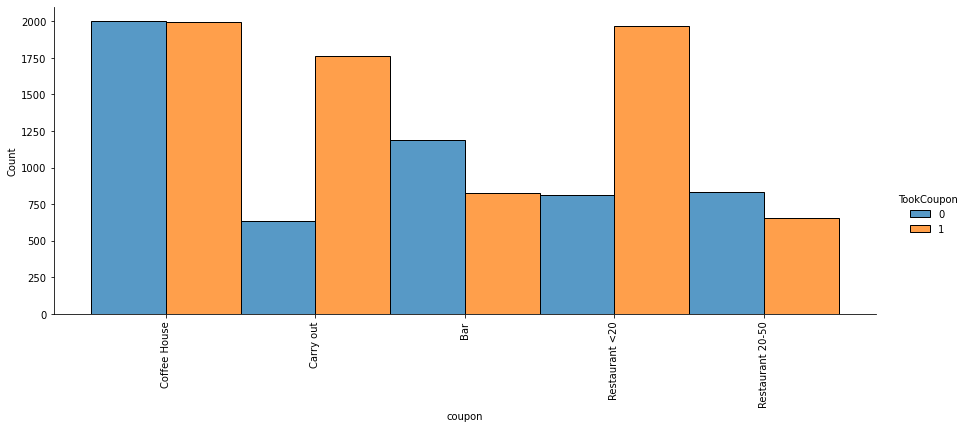

In [280]:
ax = sns.displot(data=data, x='coupon', hue='TookCoupon', multiple='dodge', height=5, aspect=2.5 )
plt.xticks(rotation=90)

More number of drivers accepted coupons were the carry out and restaurant coupons for < $20 while the acceptance rates were similar to rejected rates for other coupons.

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '0 - 12500'),
  Text(1, 0, '12500 - 24999'),
  Text(2, 0, '25000 - 37499'),
  Text(3, 0, '37500 - 49999'),
  Text(4, 0, '50000 - 62499'),
  Text(5, 0, '62500 - 74999'),
  Text(6, 0, '75000 - 87499'),
  Text(7, 0, '87500 - 99999'),
  Text(8, 0, '100000 - 999999')])

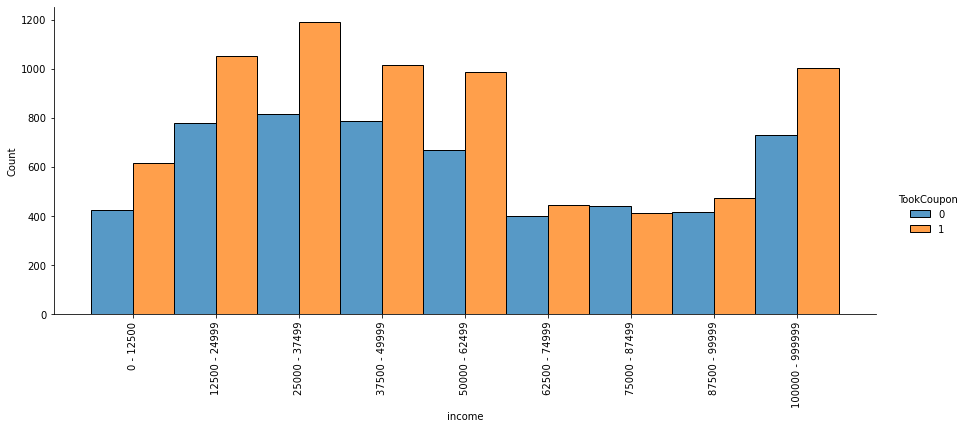

In [281]:
ax = sns.displot( data, x="income", hue="TookCoupon", multiple="dodge", height=5, aspect=2.5 )
plt.xticks(rotation=90)

Interesting comparison between income and coupon acceptance, low to middle income earners more likely to accept
coupons

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '0 - 20'),
  Text(1, 0, '21 - 25'),
  Text(2, 0, '26 - 30'),
  Text(3, 0, '31 - 35'),
  Text(4, 0, '36 - 40'),
  Text(5, 0, '41 - 45'),
  Text(6, 0, '46 - 49'),
  Text(7, 0, '50 - 99')])

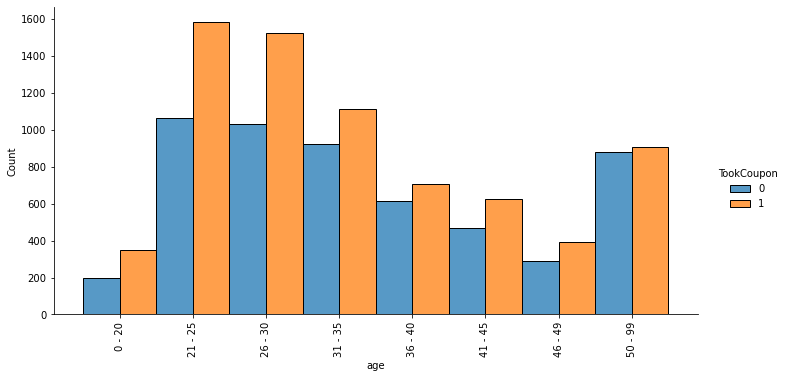

In [282]:
ax = sns.displot(data, x="age", hue="TookCoupon", multiple="dodge", height=5, aspect=2 )
plt.xticks(rotation=90)

Interesting comparison between age and coupon acceptance, younger adults more likely to accept coupon

In [4]:
# P(A) = accepted Bar coupon
# df_Bar = data.query("coupon == 'Bar'")[['TookCoupon']]
# print( df_Bar.value_counts(), len(df_Bar) )
# print( df_Bar.value_counts() / len(df_Bar) )

In [3]:
# P(B) = went to bar more than 3 times a month
# df_tmp = data.loc[ data['Bar'].gt('1~3') ]
# print(df_tmp['TookCoupon'].value_counts(), len(df_tmp))
# print(df_tmp['TookCoupon'].value_counts() / len(df_tmp))

In [2]:
# P(B|A) = went to bar more than 3 times a month and accepted coupon
# df_Bar = data.query("coupon == 'Bar'")[['TookCoupon', 'Bar']]
# df_tmp = df_Bar.loc[ df_Bar['Bar'].gt('1~3') ]
# print(df_tmp['TookCoupon'].value_counts(), len(df_tmp))
# print(df_tmp['TookCoupon'].value_counts() / len(df_tmp))

In [1]:
# P(A|B) = P(B|A) * P(A) / P(B) = accepted Bar coupon given went to the bar more than 3 times a month
# ( 0.768844 *  0.410015 ) / 0.622456 = 0.5064415358836609